In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

data = pd.read_csv("student-mat.csv", sep=';')
y = data['G3']
df = pd.get_dummies(data,drop_first=True)
df.drop(['G1','G2','G3'],axis=1,inplace=True)

In [2]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [3]:
df.shape

(395, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 39 columns):
age                  395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc                 395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null int64
school_MS            395 non-null uint8
sex_M                395 non-null uint8
address_U            395 non-null uint8
famsize_LE3          395 non-null uint8
Pstatus_T            395 non-null uint8
Mjob_health          395 non-null uint8
Mjob_other           395 non-null uint8
Mjob_services        395 non-null uint8
Mjob_teacher         395 non-null uint8
Fjob_health    

In [5]:
s = df.iloc[:,:13]

In [6]:
nots = df.iloc[:,13:]


In [7]:
nots = np.array(nots)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s_scaled = scaler.fit_transform(s)
type(s_scaled)

numpy.ndarray

In [9]:
X = np.concatenate([s_scaled,nots],axis=1)
print(X.shape)

(395, 39)


In [10]:
data['result'] = 'na'
data.loc[(data.G3 > 8), 'result'] = 1 
data.loc[(data.G3 <= 8), 'result'] = 0

In [11]:
y = data['result']
y = np.array(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

In [12]:
print(X_train.shape)

(276, 39)


In [13]:
from sklearn.svm import SVC

In [19]:
svm = SVC(kernel = 'linear', C=1)
svm.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
predictions = svm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('\n\n\nTest data\n\n\n')
print("confusion_matrix\n\n",confusion_matrix(y_test,predictions))
print("\nclassification_report\n\n",classification_report(y_test,predictions))
print("\nscore",svm.score(X_test,y_test))




Test data



confusion_matrix

 [[ 9 23]
 [ 4 83]]

classification_report

              precision    recall  f1-score   support

          0       0.69      0.28      0.40        32
          1       0.78      0.95      0.86        87

avg / total       0.76      0.77      0.74       119


score 0.773109243697479


In [26]:
predictions = svm.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
print('\n\n\nTrain data\n\n\n')
print("\n\nconfusion_matrix\n\n",confusion_matrix(y_train,predictions))
print("\n\nclassification_report\n\n",classification_report(y_train,predictions))
print("\nscore",svm.score(X_train,y_train))




Train data





confusion_matrix

 [[ 15  55]
 [  7 199]]


classification_report

              precision    recall  f1-score   support

          0       0.68      0.21      0.33        70
          1       0.78      0.97      0.87       206

avg / total       0.76      0.78      0.73       276


score 0.7753623188405797


Populating the interactive namespace from numpy and matplotlib


C:\Users\vinay\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

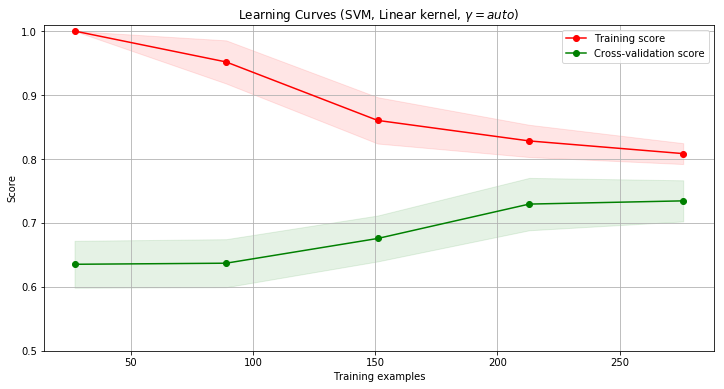

In [27]:
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)  

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (SVM, Linear kernel, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3)
estimator = SVC(kernel = 'linear', C=10,)
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)



In [28]:
svm = SVC(kernel = 'poly', C=5,degree=4)
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[ 4 28]
 [ 2 85]]
             precision    recall  f1-score   support

          0       0.67      0.12      0.21        32
          1       0.75      0.98      0.85        87

avg / total       0.73      0.75      0.68       119



Populating the interactive namespace from numpy and matplotlib


C:\Users\vinay\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

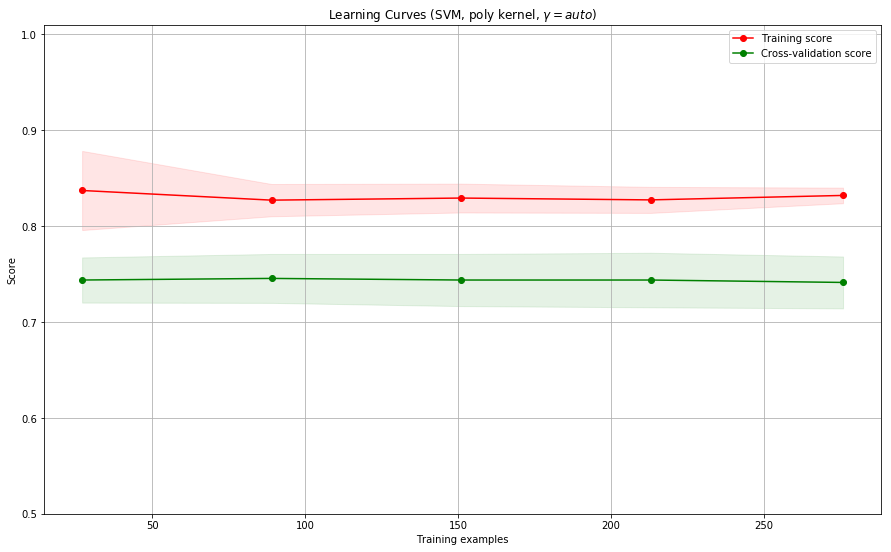

In [30]:
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)  

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (SVM, poly kernel, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3)
estimator = SVC(kernel = 'poly', C=5,degree=4)
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)


In [36]:
svm = SVC(kernel = 'rbf', C=1,gamma=0.05)
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 8 24]
 [ 1 86]]
             precision    recall  f1-score   support

          0       0.89      0.25      0.39        32
          1       0.78      0.99      0.87        87

avg / total       0.81      0.79      0.74       119



Populating the interactive namespace from numpy and matplotlib


C:\Users\vinay\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

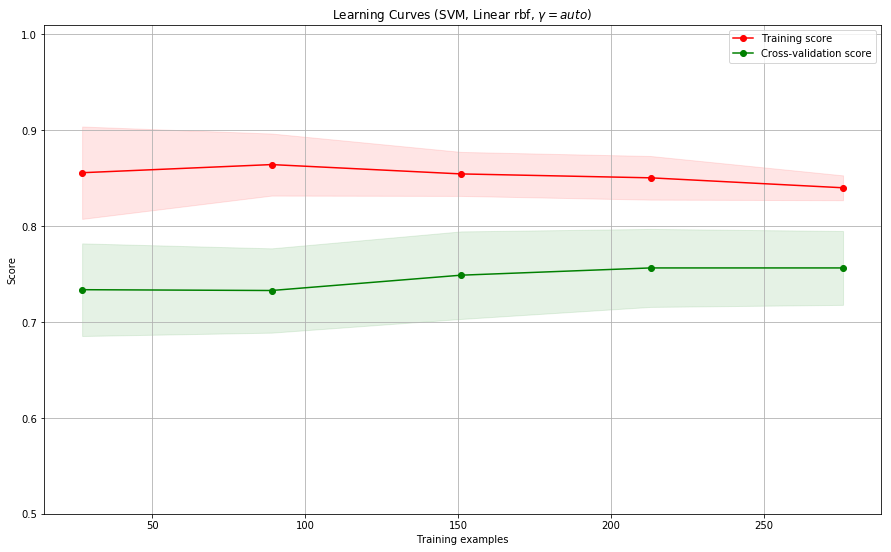

In [33]:
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)  

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (SVM, Linear rbf, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3)
estimator = SVC(kernel = 'rbf', C=1, gamma=0.05)
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)



In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10, max_depth=10)
tree.fit(X_train,y_train)
predictions = tree.predict(X_train)
print('\n\nTrain data\n\n')
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))
print(accuracy_score(y_train,predictions))



Train data


[[ 39  31]
 [ 15 191]]
             precision    recall  f1-score   support

          0       0.72      0.56      0.63        70
          1       0.86      0.93      0.89       206

avg / total       0.83      0.83      0.83       276

0.8333333333333334


In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=10,max_depth=10)
tree.fit(X_train,y_train)
predictions = tree.predict(X_test)
print('\n\nTest data\n\n')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



Test data


[[14 18]
 [17 70]]
             precision    recall  f1-score   support

          0       0.45      0.44      0.44        32
          1       0.80      0.80      0.80        87

avg / total       0.70      0.71      0.70       119



In [41]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,max_depth=10)
tree.fit(X_train,y_train)
predictions = tree.predict(X_test)
print('\n\nTest data\n\n')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))



Test data


[[14 18]
 [ 6 81]]
             precision    recall  f1-score   support

          0       0.70      0.44      0.54        32
          1       0.82      0.93      0.87        87

avg / total       0.79      0.80      0.78       119

0.7983193277310925


Populating the interactive namespace from numpy and matplotlib


C:\Users\vinay\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

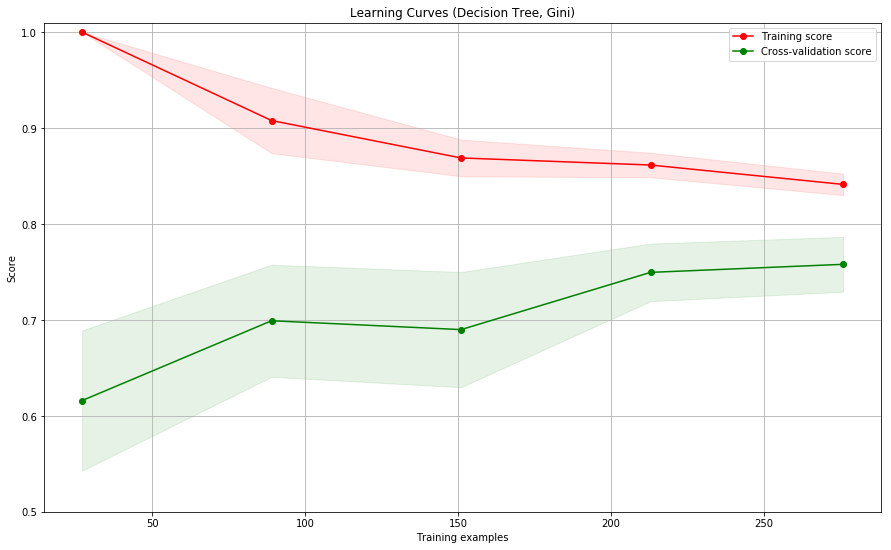

In [42]:
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)  

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (Decision Tree, Gini)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3)
estimator = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=10,max_depth=10)
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)


Populating the interactive namespace from numpy and matplotlib


C:\Users\vinay\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

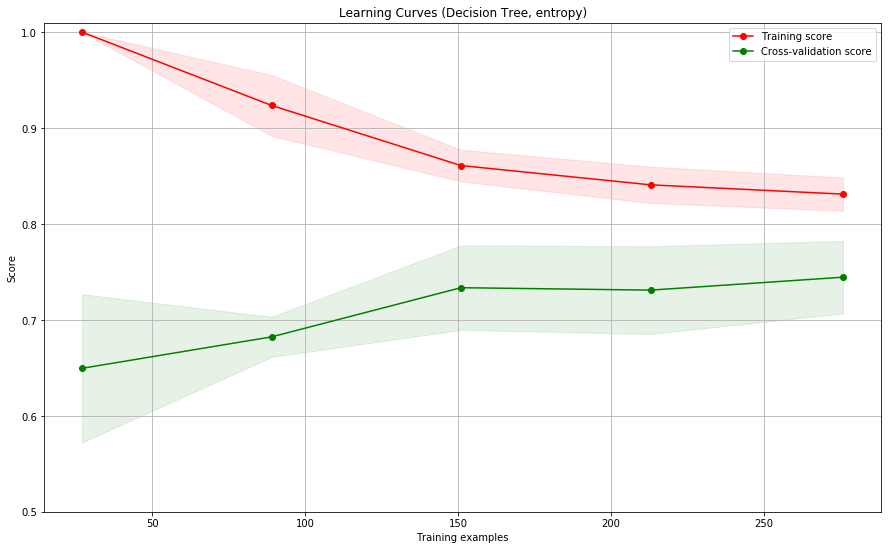

In [43]:
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)  

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (Decision Tree, entropy)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3)
estimator = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,max_depth=10)
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)

In [60]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
#tree = DecisionTreeClassifier(max_depth=50) 
#clf = AdaBoostClassifier(n_estimators=200, base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=19),learning_rate=4)
clf = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier(max_features=10,criterion='entropy',max_depth=5),learning_rate=.1)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print('\n\n test data\n\n')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



 test data


[[ 9 23]
 [ 8 79]]
             precision    recall  f1-score   support

          0       0.53      0.28      0.37        32
          1       0.77      0.91      0.84        87

avg / total       0.71      0.74      0.71       119



In [47]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
#tree = DecisionTreeClassifier(max_depth=12) 
#clf = AdaBoostClassifier(n_estimators=200, base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=14),learning_rate=4)
clf = AdaBoostClassifier(n_estimators=2, base_estimator=DecisionTreeClassifier(max_features=10,criterion='entropy',max_depth=4),learning_rate=.1)

clf.fit(X_train,y_train)
predictions = clf.predict(X_train)
print('\n\n train data\n\n')
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))



 train data


[[ 36  34]
 [  4 202]]
             precision    recall  f1-score   support

          0       0.90      0.51      0.65        70
          1       0.86      0.98      0.91       206

avg / total       0.87      0.86      0.85       276



Populating the interactive namespace from numpy and matplotlib


C:\Users\vinay\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

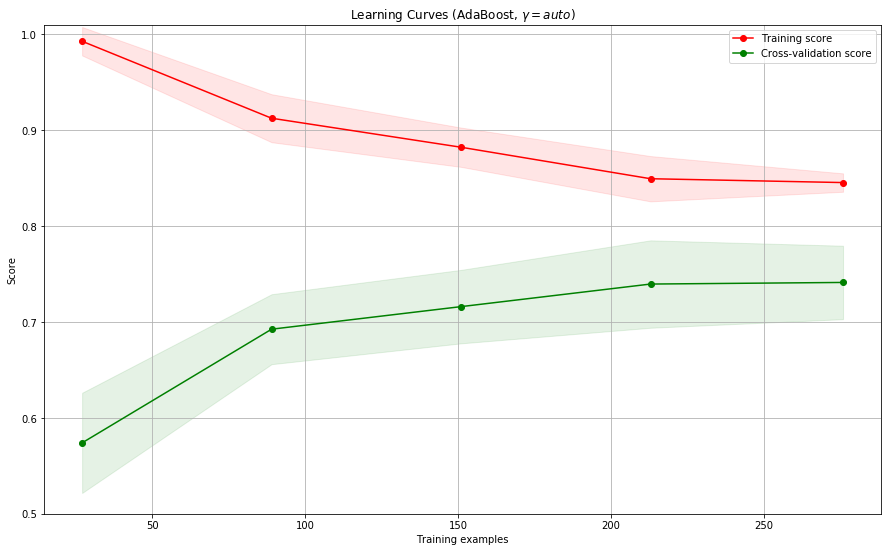

In [46]:
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)  

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (AdaBoost, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3)
estimator = AdaBoostClassifier(n_estimators=2, base_estimator=DecisionTreeClassifier(max_features=10,criterion='entropy',max_depth=4),learning_rate=.1)
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)


In [61]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification

clf = GradientBoostingClassifier(n_estimators=5, learning_rate=0.1, max_depth=5,)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('\n\ntest data')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



test data
[[ 5 27]
 [ 4 83]]
             precision    recall  f1-score   support

          0       0.56      0.16      0.24        32
          1       0.75      0.95      0.84        87

avg / total       0.70      0.74      0.68       119



In [62]:
clf = GradientBoostingClassifier(n_estimators=5, learning_rate=0.1, max_depth=5,)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('\n\n train data\n\n')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



 train data


[[ 4 28]
 [ 4 83]]
             precision    recall  f1-score   support

          0       0.50      0.12      0.20        32
          1       0.75      0.95      0.84        87

avg / total       0.68      0.73      0.67       119



Populating the interactive namespace from numpy and matplotlib


C:\Users\vinay\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

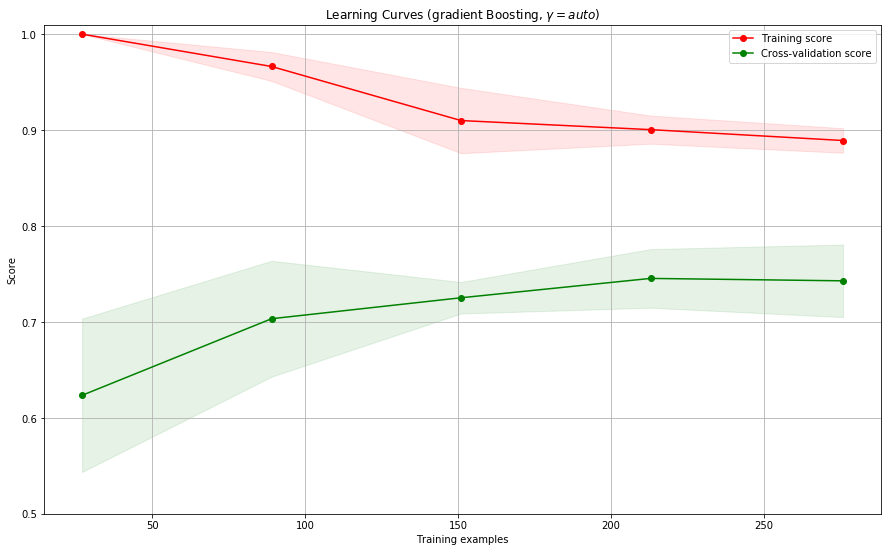

In [66]:
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)  

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (gradient Boosting, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3)
estimator = GradientBoostingClassifier(n_estimators=8, learning_rate=0.1, max_depth=5,)

plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)
